### Polynomial Linear Regression

#### Import library

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }<style>"))

#### Import dataset

In [39]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Separate X features & y labels

In [41]:
X = df.drop('sales', axis=1)
y = df['sales']

#### Polynomial Features

In [52]:
#Feature convertr, no need to split into train/test just yet
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

#polynomial_converter.fit(X)  #step 1 - prepare for transformation
#poly_featured = polynomial_converter.transform(X) #step 3 - Transforms them into polynomial features based on what was learned during fit(X)

poly_features = polynomial_converter.fit_transform(X) #OR you can do both fit and transform in one step

poly_features.shape, X.shape

((200, 9), (200, 3))

In [53]:
df2 = pd.DataFrame(data=poly_featured[0], columns=['Poly_Features'])
df2['new_col'] = ['TV', 'radio', 'newspaper', 'TV_squared', 'TV*radio', 'TV*newspaper', 'radio_squared', 'radio*newspaper', 'newspaper_squared']
#goint from 3 features to 9 (3 are original, 3 are squared and 3 are multiplication of one another), thus model will be trained on 9 features
df2

,Poly_Features,new_col
0,230.10,TV
1,37.80,radio
2,69.20,newspaper
3,52946.01,TV_squared
4,8697.78,TV*radio
5,15922.92,TV*newspaper
6,1428.84,radio_squared
7,2615.76,radio*newspaper
8,4788.64,newspaper_squared


#### Split dataset into Training and Test

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 0)
#note poly_feature now has 9 features

#### Train the model on Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Validate the model

In [59]:
test_predictions = model.predict(X_test)

new_df = pd.DataFrame({'y_pred':test_predictions.round(1), 'y_test': y_test})
new_df.head()

,y_pred,y_test
18,10.3,11.3
170,8.4,8.4
107,8.9,8.7
98,25.2,25.4
177,12.3,11.7


#### Evaluate

In [70]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mse = mean_squared_error(new_df['y_test'], new_df['y_pred'] )
rmse = np.sqrt(mse)
mae = mean_absolute_error(new_df['y_test'], new_df['y_pred'] )

r2 = r2_score(new_df['y_test'], new_df['y_pred'])

n=len(new_df['y_test'])
k = X_test.shape[1]
r2_adj = 1-(1-r2)*(n-1)/(n-k-1)

print(f'Mean Squared Error: {mse.round(7)}')
print(f'Root Mean Squared Error: {rmse.round(7)}')
print(f'Mean Absolute Error: {mse.round(7)}')
print(f'R2: {r2.round(7)}')
print(f'R2 adjusted: {r2_adj.round(7)}')

Mean Squared Error: 0.90325
Root Mean Squared Error: 0.9503947
Mean Absolute Error: 0.90325
R2: 0.9712976
R2 adjusted: 0.9626868


<span style="text-decoration: underline;">On the Linear Regression we got:</span>


- Mean Squared Error: 4.41375
- Root Mean Squared Error: 2.10089


- R-squared: 0.8597449
- R-squared adjusted: 0.8575981

Well, now comparing the two, the Polynomial model looks much better. Why's that? Plot below

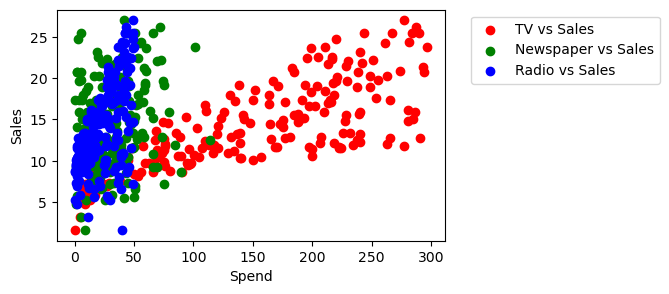

In [73]:
plt.figure(figsize=(5, 3))
plt.scatter(df['TV'], df['sales'], color='red', label='TV vs Sales')# TV vs. Sales
plt.scatter(df['newspaper'], df['sales'], color='green', label='Newspaper vs Sales')# Newspaper vs. Sales
plt.scatter(df['radio'], df['sales'], color='blue', label='Radio vs Sales')# Radio vs. Sales

plt.xlabel('Spend')
plt.ylabel('Sales')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### How do we decide which degree is best (power of 2, or 3 or 4?)

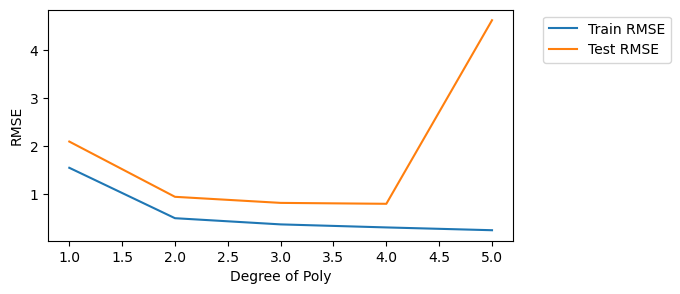

In [94]:
train_rmse_error = []
test_rmse_error = []

for degree in range(1, 10):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)  #Create PolyFeatures
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 0) # split poly features into train/test
    
    model = LinearRegression()
    model.fit(X_train, y_train)# fit model on training data
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_rmse_error.append(train_rmse)# store/save the rmse for both training and test set
    test_rmse_error.append(test_rmse)  # store/save the rmse for both training and test set


# plot the results (error vs poly order)
plt.figure(figsize=(6, 3))
plt.plot(range(1,6), train_rmse_error[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_error[:5], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

It looks like degrees between 2 and 4 are best. But it looks like 4 is not necessary, thus best it is between 2 and 3 degree. 

#### Predict new results

In [100]:
model.predict(poly_converter.fit_transform([[160.0, 30.0, 20.0]]))

array([17.41605053])

So if we spend 160 on TV, 30 on radio, and 20 on newspaper, it will generate 17 dollars. Well thats better than Linear Regression of 15.9 dollars.